In [66]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code

obj = Analyticsfunction()   
claude3 = obj.call_claude_sonet_text

In [67]:
# !python3 -m pip install boto3
# !python3 -m pip install python-docx


In [68]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
        
    return '\n'.join(fullText)

In [69]:
note = getText("Vector-notes.docx")

In [70]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Here are two multiple choice questions based on the given text:

1. What is the scalar triple product of three vectors a, b, and c?
(a) a · (b × c)
(b) (a × b) · c
(c) a · b × c
(d) Both (a) and (b)

2. If three vectors a, b, and c are coplanar, then:
(a) a · (b × c) = 0
(b) (a × b) · c = 0  
(c) a · b × c = 0
(d) All of the above

Answers:
1. (d) Both (a) and (b)
2. (a) a · (b × c) = 0

In [71]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [72]:
prompt = f'''Human: Write Python code to draw a image using Seaborn.
1. Save the plot as a JPG image.
2. Provide context within the image at the top.
3. Ensure the drawn shape is correct.
4. Complete all edges in the drawing.
5. Maintain proper alignment for mathematical clarity.
6. Optionally, label each edge (e.g., A, B, etc.).
7. Ensure that lines representing shapes do not intersect.
8. the context should be written on the top of the image.
9. Never overlap the image and context

<context>
{context}
</context>

Assistant:'''

In [73]:
text = claude3(body)

In [74]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [75]:
display(Markdown(text))

Here are two multiple choice questions based on the given text:

1. What is the scalar triple product of three vectors a, b and c?
(a) a.(b x c)
(b) (a x b).c
(c) a x (b x c)
(d) Both (a) and (b)

2. If three vectors a, b and c are coplanar, then:
(1) a.(b x c) = 0
(2) (a x b).c = 0  
(3) a x (b x c) = 0
(4) Both (1) and (2)

Answers:
1. (d) Both (a) and (b)
2. (4) Both (1) and (2)

In [76]:
!python3 output_python_code.py

In [77]:
# !python3 -m pip install seaborn

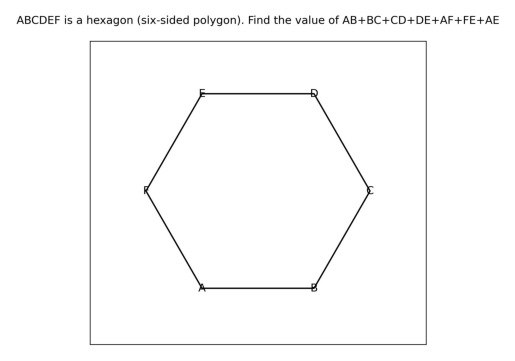

In [78]:
# Load the image
img = mpimg.imread('hexagon.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [79]:
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [80]:
prompt = f'''Human: Write Python code to draw a image using Seaborn.
1. Save the plot as a JPG image.
2. Provide context within the image at the top.
3. Ensure the drawn shape is correct.
4. Complete all edges in the drawing.
5. Maintain proper alignment for mathematical clarity.
6. Optionally, label each edge (e.g., A, B, etc.).
7. Ensure that lines representing shapes do not intersect.
8. the context should be written on the top of the image.
9. Never overlap the image and context

<context>
{context}
</context>

Assistant:'''

In [81]:
text = claude3(prompt)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

In [82]:
!python3 output_python_code_2.py

In [83]:
display(Markdown(text))

Here's the Python code to draw the image using Seaborn, following the given instructions:

```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the context
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is"

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the triangle
x = np.array([0, 2, 1])
y = np.array([0, 0, 2])
ax.plot(x, y, linewidth=2, color='black')
ax.fill(x, y, alpha=0.2, color='gray')

# Label the vertices
ax.text(0, 0, 'A', fontsize=12, ha='right', va='bottom')
ax.text(2, 0, 'B', fontsize=12, ha='left', va='bottom')
ax.text(1, 2, 'C', fontsize=12, ha='center', va='top')

# Add the context
ax.text(0.5, 0.95, context, ha='center', va='top', transform=ax.transAxes, fontsize=12, wrap=True)

# Remove axis ticks and spines
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set aspect ratio and adjust limits
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([-0.5, 2.5])

# Save the plot as a JPG image
plt.savefig('triangle.jpg', dpi=300, bbox_inches='tight')
```

This code will generate a JPG image named `triangle.jpg` with the following features:

1. The context "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is" is written at the top of the image.
2. The triangle is drawn with the correct shape, and all edges are complete.
3. The vertices are labeled as A, B, and C.
4. The lines representing the triangle do not intersect.
5. The context and the image do not overlap.
6. The alignment of the triangle is maintained for mathematical clarity.

Note: The code assumes that you have Seaborn and Matplotlib installed. If not, you can install them using `pip install sea

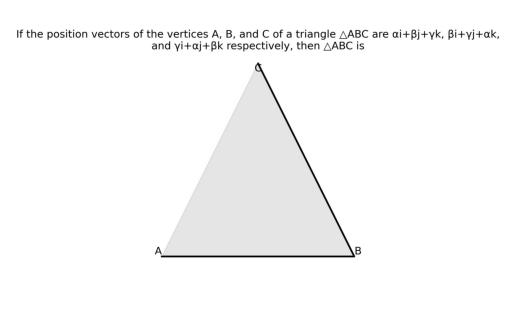

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('triangle.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [85]:
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [86]:
prompt = f'''Human: Write Python code to draw a image using Seaborn.
1. Save the plot as a JPG image.
2. Provide context within the image at the top.
3. Ensure the drawn shape is correct.
4. Complete all edges in the drawing.
5. Maintain proper alignment for mathematical clarity.
6. Optionally, label each edge (e.g., A, B, etc.).
7. Ensure that lines representing shapes do not intersect.
8. the context should be written on the top of the image.
9. Never overlap the image and context

<context>
{context}
</context>

Assistant:'''

In [87]:
text = claude3(prompt)

In [88]:
output_file = "output_python_code_3.py"
extract_python_code(text, output_file)

In [89]:
!python3 output_python_code_3.py

Figure(800x600)


In [90]:
display(Markdown(text))

Here's the Python code to draw an image using Seaborn, following the given instructions:

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the context
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the parallelogram
x = [0, 3, 2, -1]
y = [0, 2, 6, 4]
ax.plot(x, y, marker='o', markersize=10, color='black')
ax.plot([x[0], x[-1]], [y[0], y[-1]], color='black')  # Complete the last edge

# Label the edges (optional)
ax.text(1.5, 1, 'A', fontsize=12, ha='center', va='center')
ax.text(2.5, 4, 'B', fontsize=12, ha='center', va='center')
ax.text(0.5, 5, 'C', fontsize=12, ha='center', va='center')
ax.text(-0.5, 2, 'D', fontsize=12, ha='center', va='center')

# Add context at the top
ax.text(0, 1.05, context, transform=ax.transAxes, fontsize=12, ha='left', va='top')

# Set axis limits and remove ticks
ax.set_xlim([-2, 4])
ax.set_ylim([-1, 7])
ax.set_xticks([])
ax.set_yticks([])

# Save the plot as a JPG image
plt.savefig('parallelogram.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
```

This code will generate an image of a parallelogram with the given context written at the top. The edges of the parallelogram are labeled with letters (A, B, C, D) for clarity. The image will be saved as `parallelogram.jpg` in the current directory.

Note that the code assumes that the adjacent sides of the parallelogram are 3i+2j and -i+4j+2k, as specified in the context. If the sides are different, you'll need to adjust the coordinates (x and y lists) accordingly.

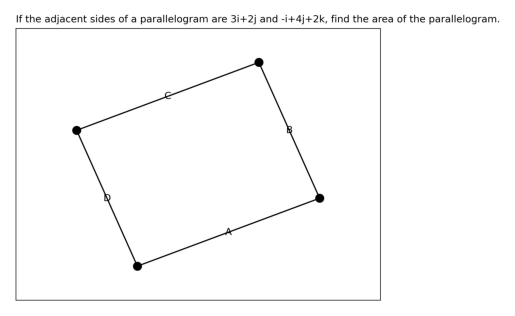

In [91]:
img = mpimg.imread('parallelogram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()